In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
my_data=pd.read_csv("/content/breastCancer.csv")

In [3]:
my_data.head()

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


**Data Pre-processing**

In [4]:
my_data['class'].value_counts()

2    458
4    241
Name: class, dtype: int64

In [5]:
my_data.shape

(699, 11)

In [6]:
my_data.dtypes

id                    int64
clump_thickness       int64
size_uniformity       int64
shape_uniformity      int64
marginal_adhesion     int64
epithelial_size       int64
bare_nucleoli        object
bland_chromatin       int64
normal_nucleoli       int64
mitoses               int64
class                 int64
dtype: object

In [7]:
my_data['bare_nucleoli']

0       1
1      10
2       2
3       4
4       1
       ..
694     2
695     1
696     3
697     4
698     5
Name: bare_nucleoli, Length: 699, dtype: object

In [8]:
my_data[my_data['bare_nucleoli']=='?']

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
23,1057013,8,4,5,1,2,?,7,3,1,4
40,1096800,6,6,6,9,6,?,7,8,1,2
139,1183246,1,1,1,1,1,?,2,1,1,2
145,1184840,1,1,3,1,2,?,2,1,1,2
158,1193683,1,1,2,1,3,?,1,1,1,2
164,1197510,5,1,1,1,2,?,3,1,1,2
235,1241232,3,1,4,1,2,?,3,1,1,2
249,169356,3,1,1,1,2,?,3,1,1,2
275,432809,3,1,3,1,2,?,2,1,1,2
292,563649,8,8,8,1,2,?,6,10,1,4


In [9]:
my_data[my_data['bare_nucleoli']=='?'].sum()

id                           13721250
clump_thickness                    54
size_uniformity                    39
shape_uniformity                   46
marginal_adhesion                  29
epithelial_size                    39
bare_nucleoli        ????????????????
bland_chromatin                    50
normal_nucleoli                    44
mitoses                            16
class                              36
dtype: object

In [10]:
digits_in_bare_nucleoli=my_data.bare_nucleoli.str.isdigit()

In [11]:
digits_in_bare_nucleoli

0      True
1      True
2      True
3      True
4      True
       ... 
694    True
695    True
696    True
697    True
698    True
Name: bare_nucleoli, Length: 699, dtype: bool

In [12]:
my_df=my_data.replace('?',np.nan)

In [13]:
my_df.bare_nucleoli

0       1
1      10
2       2
3       4
4       1
       ..
694     2
695     1
696     3
697     4
698     5
Name: bare_nucleoli, Length: 699, dtype: object

In [14]:
my_df.median()

id                   1171710.0
clump_thickness            4.0
size_uniformity            1.0
shape_uniformity           1.0
marginal_adhesion          1.0
epithelial_size            2.0
bare_nucleoli              1.0
bland_chromatin            3.0
normal_nucleoli            1.0
mitoses                    1.0
class                      2.0
dtype: float64

In [15]:
my_df.describe

<bound method NDFrame.describe of           id  clump_thickness  size_uniformity  ...  normal_nucleoli  mitoses  class
0    1000025                5                1  ...                1        1      2
1    1002945                5                4  ...                2        1      2
2    1015425                3                1  ...                1        1      2
3    1016277                6                8  ...                7        1      2
4    1017023                4                1  ...                1        1      2
..       ...              ...              ...  ...              ...      ...    ...
694   776715                3                1  ...                1        1      2
695   841769                2                1  ...                1        1      2
696   888820                5               10  ...               10        2      4
697   897471                4                8  ...                6        1      4
698   897471                4  

In [16]:
my_df=my_df.fillna(my_df.median())

In [17]:
my_df.bare_nucleoli

0       1
1      10
2       2
3       4
4       1
       ..
694     2
695     1
696     3
697     4
698     5
Name: bare_nucleoli, Length: 699, dtype: object

In [18]:
my_df.dtypes

id                    int64
clump_thickness       int64
size_uniformity       int64
shape_uniformity      int64
marginal_adhesion     int64
epithelial_size       int64
bare_nucleoli        object
bland_chromatin       int64
normal_nucleoli       int64
mitoses               int64
class                 int64
dtype: object

In [19]:
my_df['bare_nucleoli']=my_df['bare_nucleoli'].astype('int64')

In [20]:
my_df.dtypes

id                   int64
clump_thickness      int64
size_uniformity      int64
shape_uniformity     int64
marginal_adhesion    int64
epithelial_size      int64
bare_nucleoli        int64
bland_chromatin      int64
normal_nucleoli      int64
mitoses              int64
class                int64
dtype: object

**Exploratory Data Analysis**

In [21]:
my_df.head()

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [22]:
my_df.drop('id',axis=1,inplace=True)

In [23]:
my_df.head()

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [24]:
my_df.describe().T

,count,mean,std,min,25%,50%,75%,max
clump_thickness,699.0,4.417740,2.815741,1.0,2.0,4.0,6.0,10.0
size_uniformity,699.0,3.134478,3.051459,1.0,1.0,1.0,5.0,10.0
shape_uniformity,699.0,3.207439,2.971913,1.0,1.0,1.0,5.0,10.0
marginal_adhesion,699.0,2.806867,2.855379,1.0,1.0,1.0,4.0,10.0
epithelial_size,699.0,3.216023,2.214300,1.0,2.0,2.0,4.0,10.0
bare_nucleoli,699.0,3.486409,3.621929,1.0,1.0,1.0,5.0,10.0
bland_chromatin,699.0,3.437768,2.438364,1.0,2.0,3.0,5.0,10.0
normal_nucleoli,699.0,2.866953,3.053634,1.0,1.0,1.0,4.0,10.0
mitoses,699.0,1.589413,1.715078,1.0,1.0,1.0,1.0,10.0
class,699.0,2.689557,0.951273,2.0,2.0,2.0,4.0,4.0


In [26]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


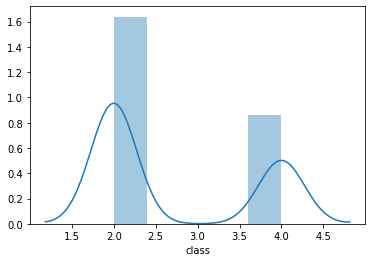

In [27]:
sns.distplot(my_df['class'])

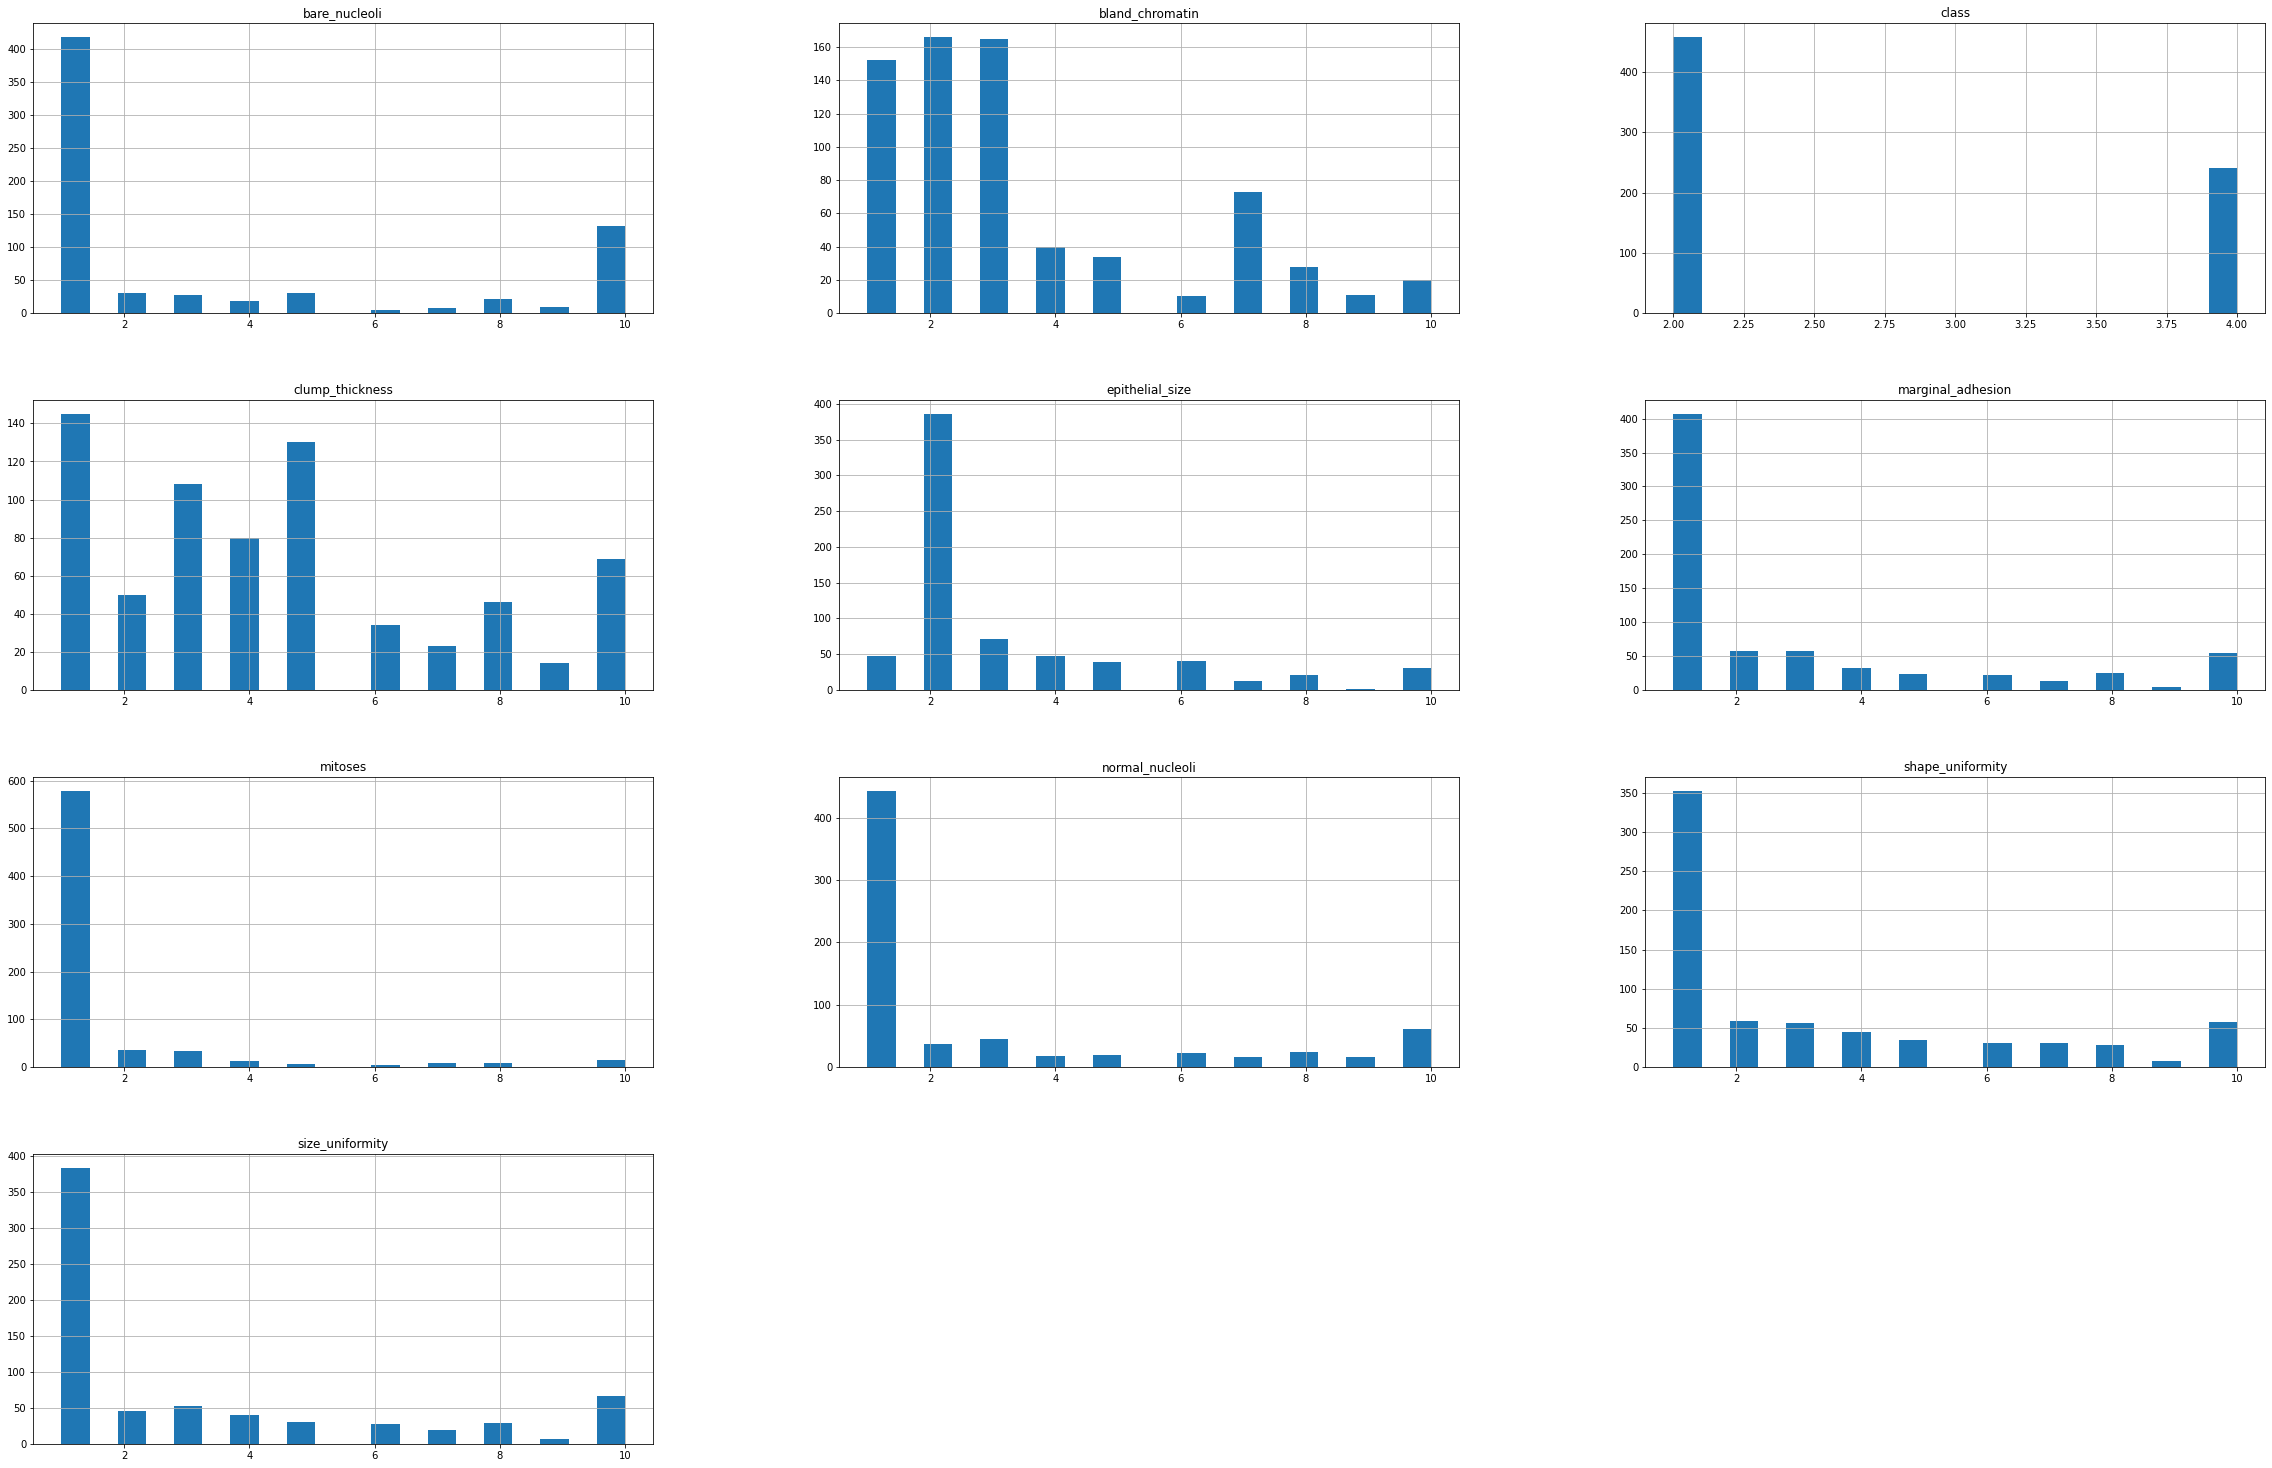

In [28]:
my_df.hist(bins=20, figsize=(40,40),layout=(6,3));

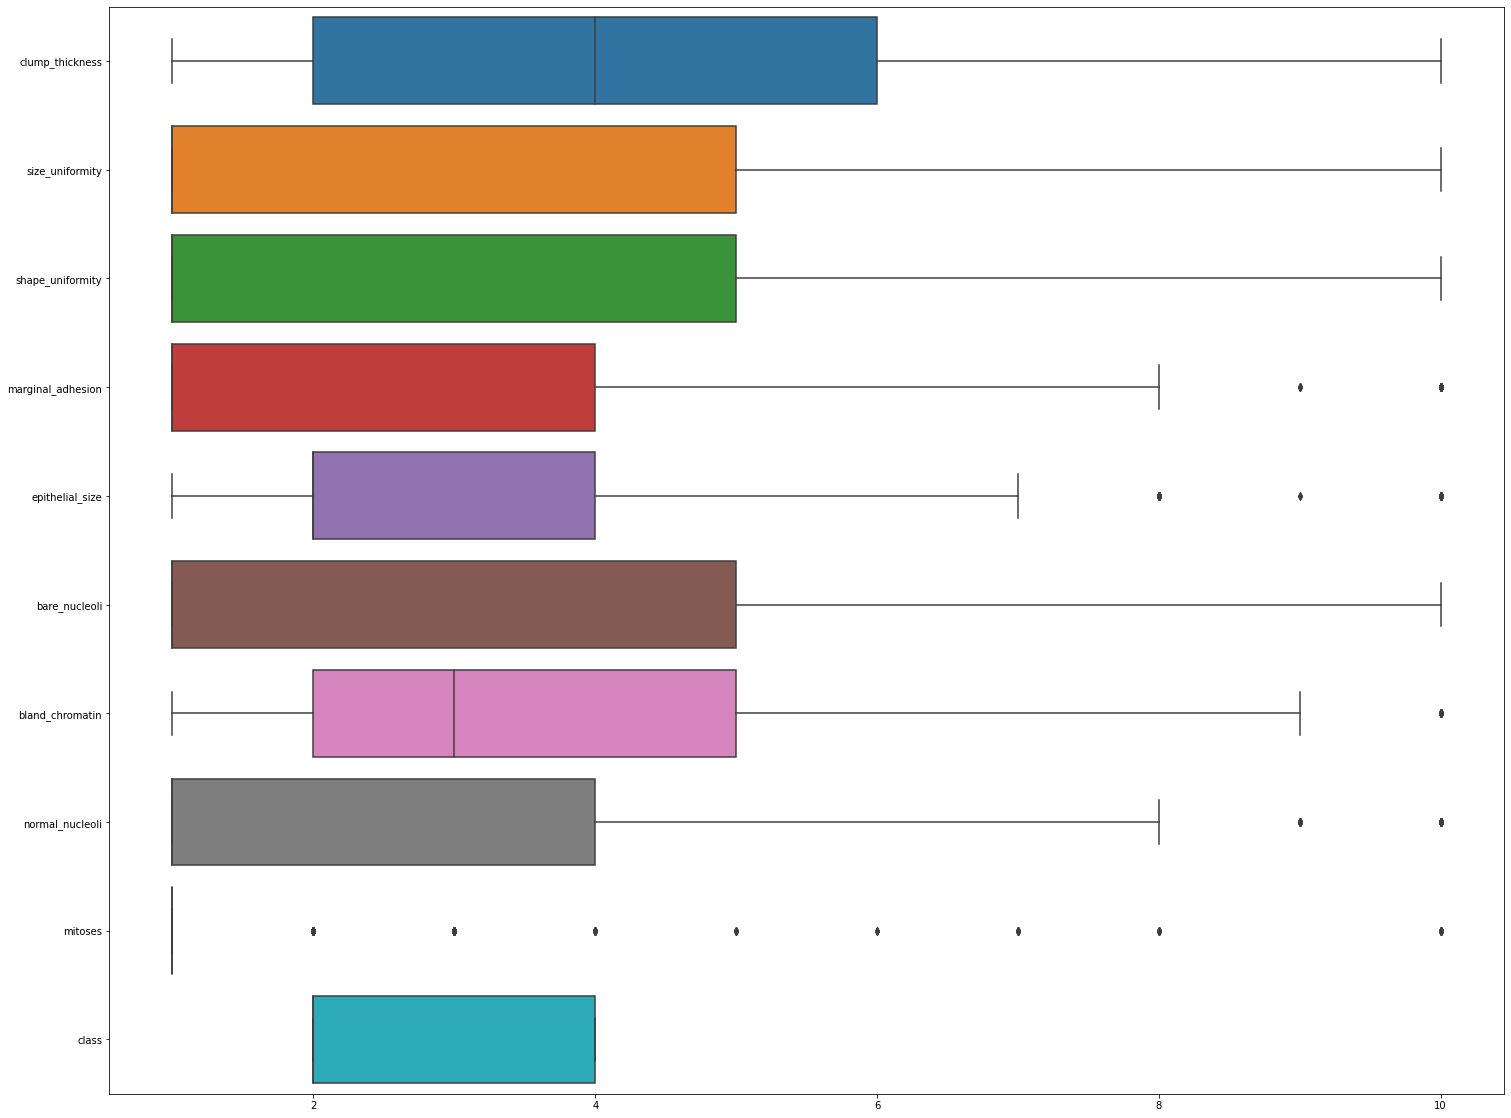

In [29]:
plt.figure(figsize=(25,20))
sns.boxplot(data=my_df, orient='h')

In [30]:
my_df.corr()

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
clump_thickness,1.000000,0.644913,0.654589,0.486356,0.521816,0.590008,0.558428,0.535835,0.350034,0.716001
size_uniformity,0.644913,1.000000,0.906882,0.705582,0.751799,0.686673,0.755721,0.722865,0.458693,0.817904
shape_uniformity,0.654589,0.906882,1.000000,0.683079,0.719668,0.707474,0.735948,0.719446,0.438911,0.818934
marginal_adhesion,0.486356,0.705582,0.683079,1.000000,0.599599,0.666971,0.666715,0.603352,0.417633,0.696800
epithelial_size,0.521816,0.751799,0.719668,0.599599,1.000000,0.583701,0.616102,0.628881,0.479101,0.682785
bare_nucleoli,0.590008,0.686673,0.707474,0.666971,0.583701,1.000000,0.674215,0.574778,0.342397,0.818968
bland_chromatin,0.558428,0.755721,0.735948,0.666715,0.616102,0.674215,1.000000,0.665878,0.344169,0.756616
normal_nucleoli,0.535835,0.722865,0.719446,0.603352,0.628881,0.574778,0.665878,1.000000,0.428336,0.712244
mitoses,0.350034,0.458693,0.438911,0.417633,0.479101,0.342397,0.344169,0.428336,1.000000,0.423170
class,0.716001,0.817904,0.818934,0.696800,0.682785,0.818968,0.756616,0.712244,0.423170,1.000000


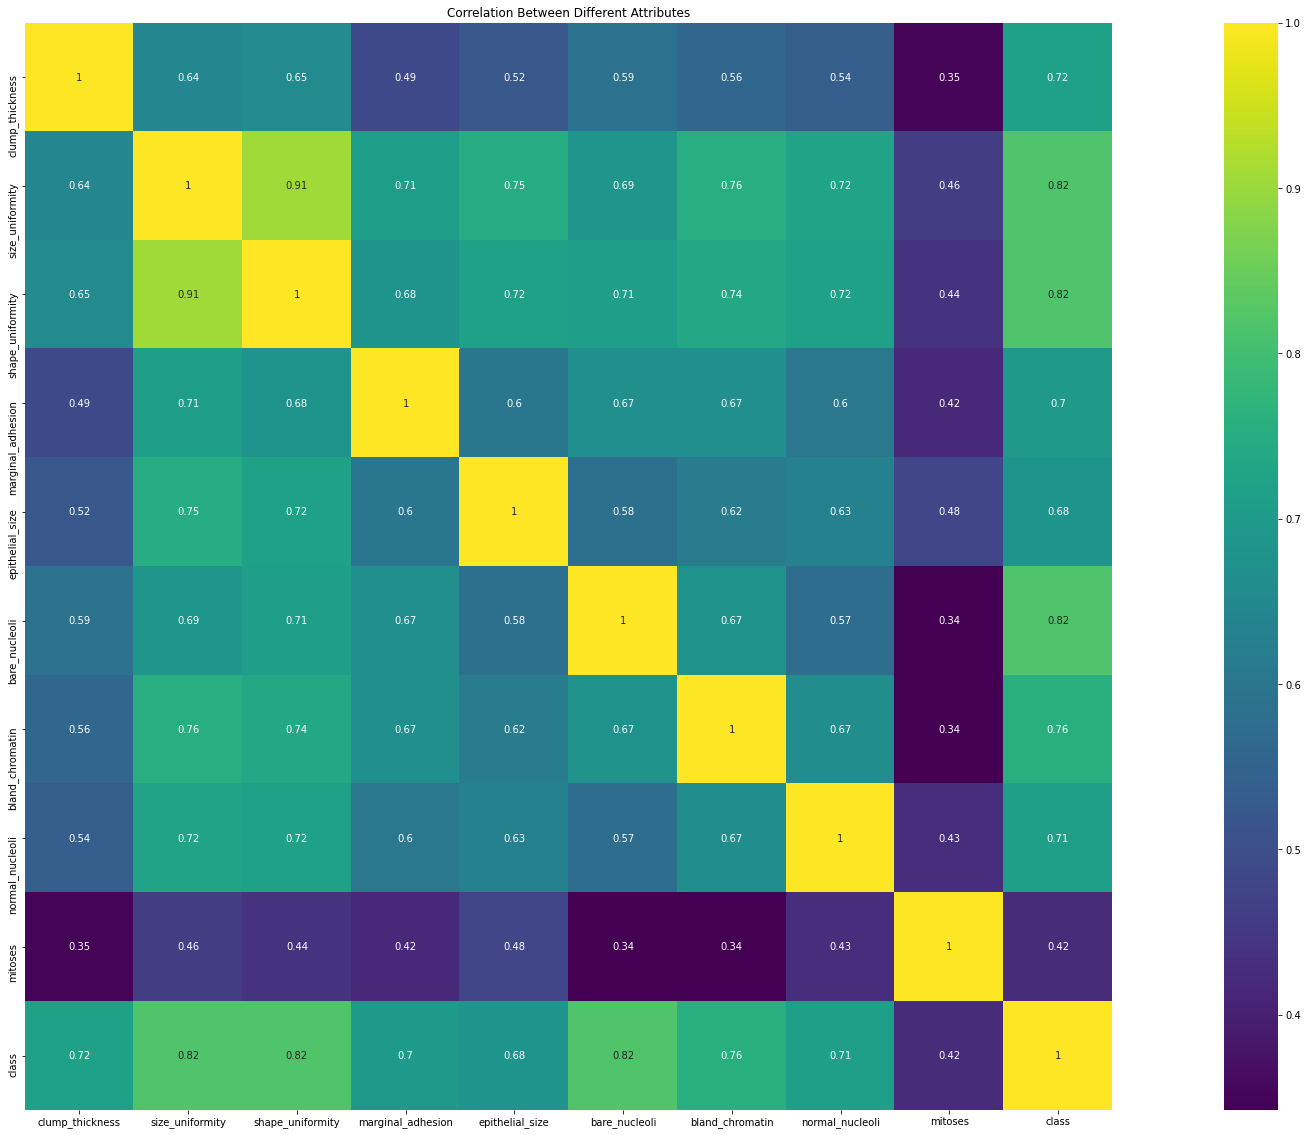

In [31]:
plt.figure(figsize=(40,20))

sns.heatmap(my_df.corr(), vmax=1, square=True, annot=True,cmap='viridis')
plt.title('Correlation Between Different Attributes')
plt.show()

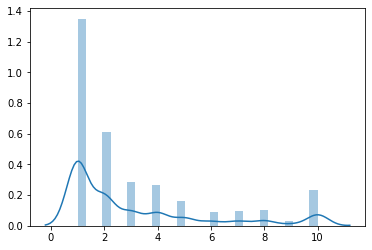

In [32]:
try:
    sns.distplot(my_df)
except RuntimeError as re:
    if str(re).startswith("Selected KDE bandwidth is 0. Cannot estimate density."):
        sns.distplot(my_df, kde_kws={'bw': 0.1})
    else:
        raise re

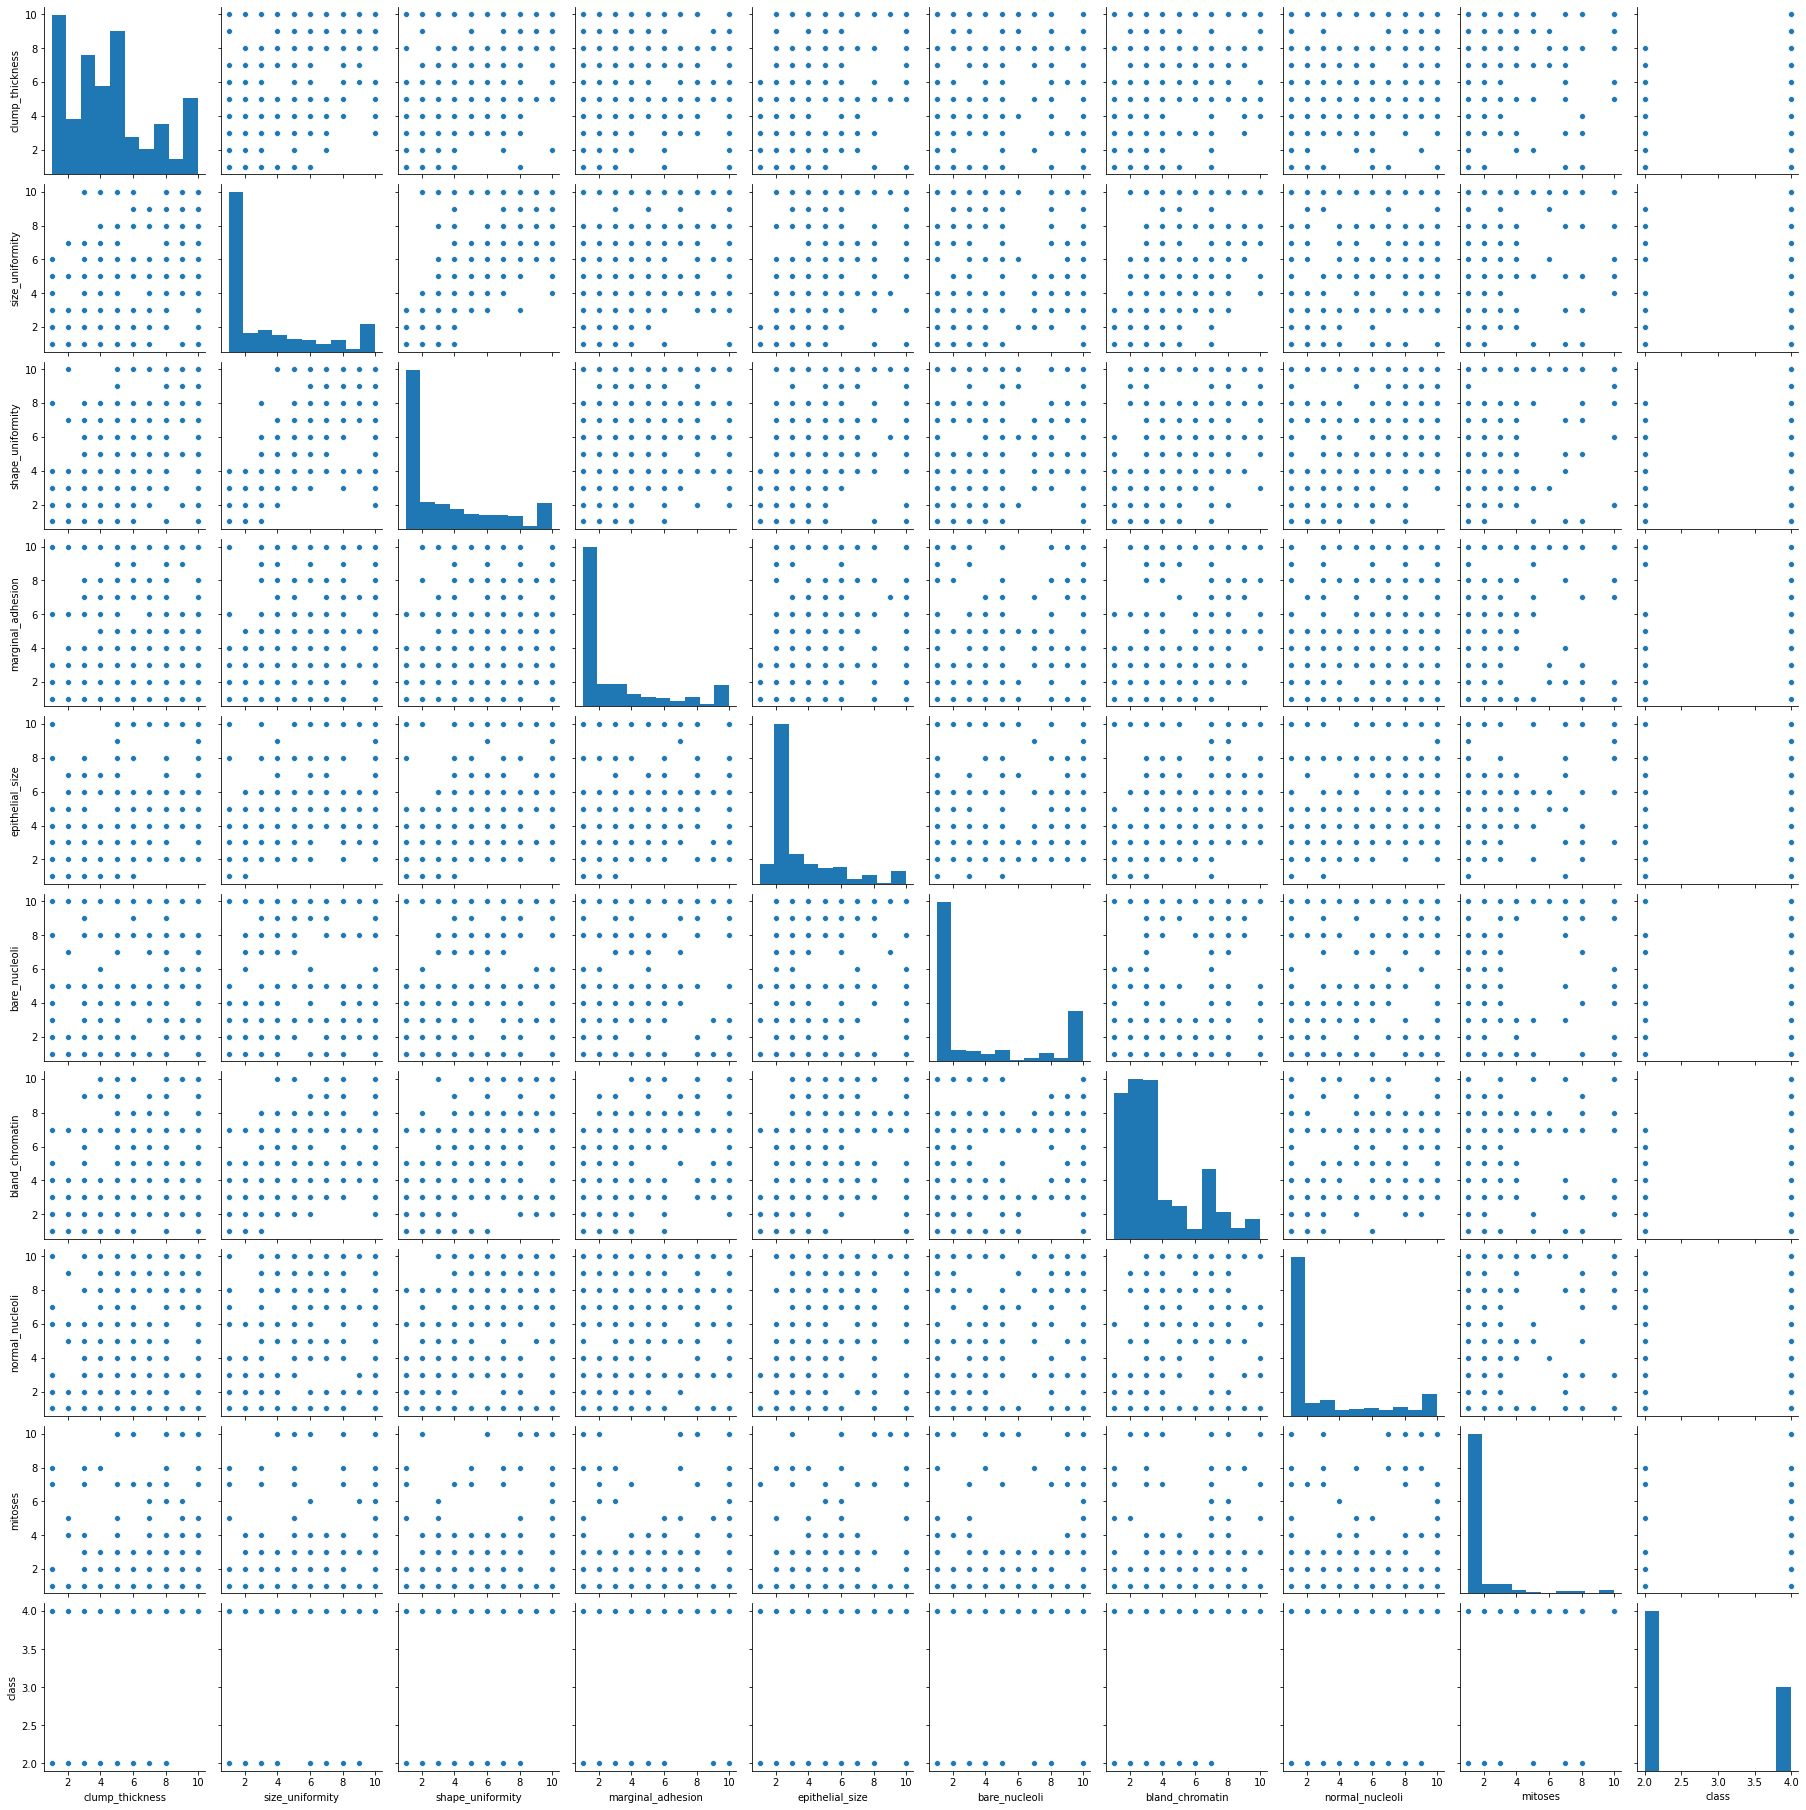

In [33]:
try:
    sns.pairplot(my_df)
except RuntimeError as re:
    if str(re).startswith("Selected KDE bandwidth is 0. Cannot estimate density."):
        sns.pair(my_df, kde_kws={'bw': 0.1})
    else:
        raise re

**Building Our Model**

In [34]:
my_df.head()

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [35]:
X=my_df.drop('class',axis=1)
y=my_df['class']

In [36]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=1)

**KNeighborsClassifier**

In [37]:
from sklearn.neighbors import KNeighborsClassifier

In [38]:
KNN=KNeighborsClassifier(n_neighbors=5, weights='distance')

In [39]:
KNN.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')

In [40]:
predicted_1=KNN.predict(X_test)
predicted_1

array([2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 4, 4, 2, 2, 4, 4, 2, 2, 2, 2, 2, 4,
       4, 2, 4, 2, 4, 4, 2, 2, 2, 4, 4, 4, 4, 4, 2, 4, 2, 2, 2, 2, 2, 2,
       2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 4, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2, 2, 2, 4, 4, 2, 4, 2, 2, 2, 4,
       4, 2, 4, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 4, 2, 4, 2,
       4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 2, 2, 2, 4, 2, 2, 2, 4,
       4, 2, 4, 2, 2, 2, 4, 4, 2, 4, 2, 2, 2, 4, 2, 4, 2, 2, 2, 2, 2, 4,
       2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4,
       4, 4, 4, 4, 4, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 4, 2, 4, 4, 4,
       4, 2, 2, 2, 2, 2, 4, 4, 4, 2, 2, 2])

In [41]:
from scipy.stats import zscore

In [42]:
print("KNeighborsClassifier Algorithm has predicted {0:2g}%".format(KNN.score(X_test,y_test)*100))

KNeighborsClassifier Algorithm has predicted 97.1429%


**Support Vector Machine**

In [43]:
from sklearn.svm import SVC

In [44]:
svc=SVC(gamma=0.025, C=3)
svc.fit(X_train,y_train)

SVC(C=3, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.025, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [45]:
prediction_2=svc.predict(X_test)
prediction_2

array([2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 4, 4, 2, 2, 4, 4, 2, 2, 2, 2, 2, 4,
       4, 2, 4, 2, 4, 4, 2, 2, 2, 4, 4, 4, 4, 4, 2, 4, 2, 2, 2, 2, 2, 2,
       2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 4, 4, 4, 2, 2, 4, 2, 2, 2, 2, 2, 2,
       2, 4, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2, 2, 2, 4, 4, 2, 4, 2, 2, 2, 4,
       4, 2, 4, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 4, 4, 2, 2, 4, 4, 2, 4, 2,
       4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 2, 4, 2, 4, 2, 2, 2, 4,
       4, 2, 4, 2, 2, 2, 4, 4, 2, 4, 2, 2, 2, 4, 2, 4, 2, 2, 2, 2, 2, 4,
       2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 4, 2, 2, 2, 2, 2, 4, 4, 2, 2, 4,
       4, 4, 4, 4, 4, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 4, 2, 4, 4, 4,
       4, 2, 2, 2, 2, 2, 4, 4, 4, 2, 2, 2])

In [46]:
print("Support Vector Machine Algorithm has predicted {0:2g}%".format(svc.score(X_test,y_test)*100))

Support Vector Machine Algorithm has predicted 98.0952%


In [47]:
Knn_Predictions=pd.DataFrame(predicted_1)
Svc_Predictions=pd.DataFrame(prediction_2)

In [48]:
df_new=pd.concat([Knn_Predictions,Svc_Predictions],axis=1)

In [49]:
df_new.columns=[['Knn_Predictions','Svc_Predictions']]
df_new

,Knn_Predictions,Svc_Predictions
0,2,2
1,2,2
2,2,2
3,4,4
4,2,2
...,...,...
205,4,4
206,4,4
207,2,2
208,2,2


In [50]:
from sklearn.metrics import classification_report

In [51]:
print('KNN Classification Report')

print('>>>'*10)

print(classification_report(y_test,predicted_1))

KNN Classification Report
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
              precision    recall  f1-score   support

           2       0.96      0.99      0.98       137
           4       0.99      0.93      0.96        73

    accuracy                           0.97       210
   macro avg       0.98      0.96      0.97       210
weighted avg       0.97      0.97      0.97       210



In [52]:
print('SVC Classification Report')

print('>>>'*10)

print(classification_report(y_test,prediction_2))

SVC Classification Report
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
              precision    recall  f1-score   support

           2       0.99      0.99      0.99       137
           4       0.97      0.97      0.97        73

    accuracy                           0.98       210
   macro avg       0.98      0.98      0.98       210
weighted avg       0.98      0.98      0.98       210



**Let's try Lazy Predict The All-rounder!**

In [58]:
!pip install lazypredict

In [61]:
import lazypredict
from lazypredict.Supervised import LazyClassifier

In [63]:
data = my_df
X=my_df.drop('class',axis=1)
y=my_df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.3,random_state =1)
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
models

 94%|█████████▎| 29/31 [00:01<00:00, 24.68it/s]

Learning rate set to 0.00759
0:	learn: 0.6788821	total: 49.3ms	remaining: 49.2s
1:	learn: 0.6653885	total: 50.2ms	remaining: 25s
2:	learn: 0.6508626	total: 51ms	remaining: 16.9s
3:	learn: 0.6354642	total: 51.7ms	remaining: 12.9s
4:	learn: 0.6240924	total: 52.5ms	remaining: 10.5s
5:	learn: 0.6101615	total: 53.3ms	remaining: 8.83s
6:	learn: 0.5986513	total: 54ms	remaining: 7.66s
7:	learn: 0.5847635	total: 54.8ms	remaining: 6.79s
8:	learn: 0.5712522	total: 55.6ms	remaining: 6.12s
9:	learn: 0.5586419	total: 56.3ms	remaining: 5.57s
10:	learn: 0.5467482	total: 57ms	remaining: 5.13s
11:	learn: 0.5373036	total: 57.6ms	remaining: 4.74s
12:	learn: 0.5276300	total: 58.3ms	remaining: 4.43s
13:	learn: 0.5172605	total: 59.1ms	remaining: 4.16s
14:	learn: 0.5064594	total: 59.8ms	remaining: 3.93s
15:	learn: 0.4969149	total: 60.4ms	remaining: 3.72s
16:	learn: 0.4880565	total: 61.2ms	remaining: 3.54s
17:	learn: 0.4795271	total: 61.9ms	remaining: 3.38s
18:	learn: 0.4684212	total: 62.7ms	remaining: 3.23s
1

100%|██████████| 31/31 [00:02<00:00, 14.76it/s]

883:	learn: 0.0169741	total: 722ms	remaining: 94.7ms
884:	learn: 0.0169483	total: 722ms	remaining: 93.9ms
885:	learn: 0.0169305	total: 723ms	remaining: 93.1ms
886:	learn: 0.0169116	total: 725ms	remaining: 92.3ms
887:	learn: 0.0168648	total: 726ms	remaining: 91.5ms
888:	learn: 0.0168373	total: 727ms	remaining: 90.7ms
889:	learn: 0.0168147	total: 728ms	remaining: 89.9ms
890:	learn: 0.0167759	total: 729ms	remaining: 89.2ms
891:	learn: 0.0167519	total: 730ms	remaining: 88.3ms
892:	learn: 0.0167269	total: 730ms	remaining: 87.5ms
893:	learn: 0.0167005	total: 731ms	remaining: 86.7ms
894:	learn: 0.0166870	total: 732ms	remaining: 85.9ms
895:	learn: 0.0166561	total: 733ms	remaining: 85ms
896:	learn: 0.0166302	total: 733ms	remaining: 84.2ms
897:	learn: 0.0166116	total: 734ms	remaining: 83.4ms
898:	learn: 0.0165889	total: 735ms	remaining: 82.5ms
899:	learn: 0.0165760	total: 735ms	remaining: 81.7ms
900:	learn: 0.0165453	total: 736ms	remaining: 80.9ms
901:	learn: 0.0165299	total: 737ms	remaining: 80

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
CatBoostClassifier,0.98,0.98,0.98,0.98,0.98
SVC,0.98,0.98,0.98,0.98,0.01
KNeighborsClassifier,0.98,0.98,0.98,0.98,0.02
LinearSVC,0.98,0.98,0.98,0.98,0.02
BernoulliNB,0.98,0.98,0.98,0.98,0.02
GaussianNB,0.97,0.97,0.97,0.97,0.01
SGDClassifier,0.98,0.97,0.97,0.98,0.01
NuSVC,0.97,0.97,0.97,0.97,0.02
LGBMClassifier,0.98,0.97,0.97,0.98,0.06


In [76]:
print('Top 10 Performing Models')
print('>>>'*10)
models.head(10)

Top 10 Performing Models
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
CatBoostClassifier,0.98,0.98,0.98,0.98,0.98
SVC,0.98,0.98,0.98,0.98,0.01
KNeighborsClassifier,0.98,0.98,0.98,0.98,0.02
LinearSVC,0.98,0.98,0.98,0.98,0.02
BernoulliNB,0.98,0.98,0.98,0.98,0.02
GaussianNB,0.97,0.97,0.97,0.97,0.01
SGDClassifier,0.98,0.97,0.97,0.98,0.01
NuSVC,0.97,0.97,0.97,0.97,0.02
LGBMClassifier,0.98,0.97,0.97,0.98,0.06


KNN Confusion Matrix


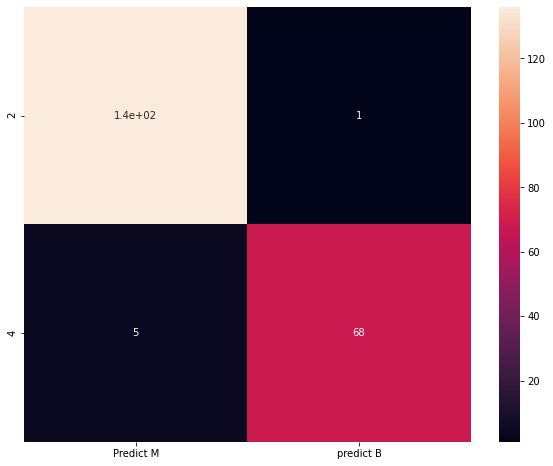

In [53]:
from sklearn import metrics

print('KNN Confusion Matrix')

cm=metrics.confusion_matrix(y_test,predicted_1, labels=[2,4])

df_cm=pd.DataFrame(cm, index=[i for i in [2,4]],columns=[i for i in ['Predict M','predict B']])

plt.figure(figsize=(10,8))
sns.heatmap(df_cm, annot=True)

SVC Confusion Matrix


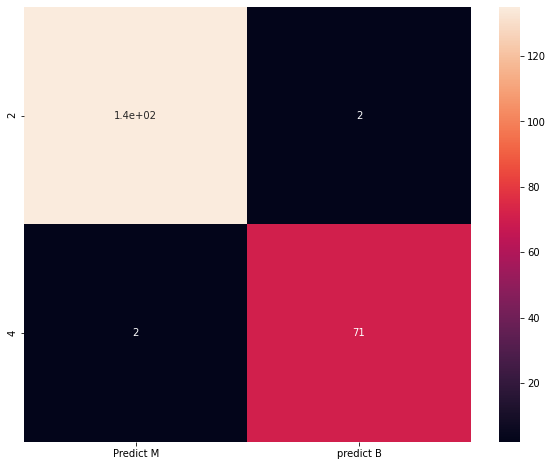

In [54]:
from sklearn import metrics

print('SVC Confusion Matrix')

cm=metrics.confusion_matrix(y_test,prediction_2, labels=[2,4])

df_cm=pd.DataFrame(cm, index=[i for i in [2,4]],columns=[i for i in ['Predict M','predict B']])

plt.figure(figsize=(10,8))
sns.heatmap(df_cm, annot=True)